<a href="https://colab.research.google.com/github/Satwikram/Large-Language-Models-Implementation/blob/main/Gemini/Gemini%20AI%20-%20Few%20shot%20multi-modal%20learning.ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Author: Satwik Ram

### Setup

In [ ]:
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.9/146.9 kB 3.0 MB/s eta 0:00:00


### Importing dependencies

In [ ]:
import google.generativeai as genai

import PIL.Image
import matplotlib.pyplot as plt


### Configure the API key

In [ ]:
with open("gemini.txt", "r") as f:
  GOOGLE_API_KEY = f.read()

In [ ]:
genai.configure(api_key=GOOGLE_API_KEY)

### Loading Fake vs Legitimate ads

In [ ]:
img1 = PIL.Image.open("/content/fake1.jpeg")
img2 = PIL.Image.open("/content/fake2.jpg")
img3 = PIL.Image.open("/content/legitimate1.jpg")
img4 = PIL.Image.open("/content/legitimate2.jpg")
img5 = PIL.Image.open("/content/fake3.png")

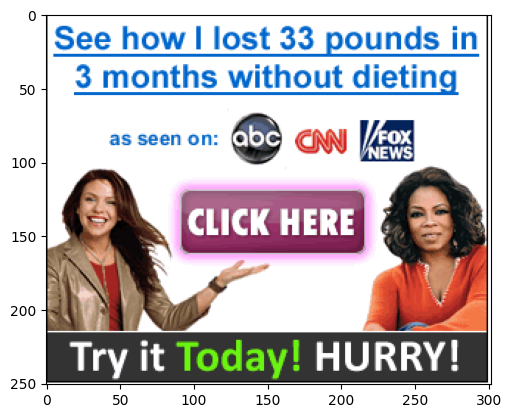

In [ ]:
plt.imshow(img5)

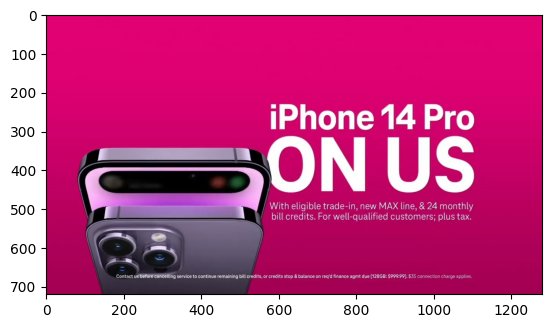

In [ ]:
plt.imshow(img3)

### Prompting Gemini model

In [ ]:
multimodal_model = genai.GenerativeModel('gemini-pro-vision')

In [63]:
example_text1 = """Text: remedii WATER Want to lose weight the easy way? Get the remedii"
                   Answer: Fake
                   Image:
                   """

example_text2 = """Text: http://very.very.legit incidio GRAND PRIZE WINNER! CONGRATULATIONS CLAIM YOUR REWARD
                        Would you like to claim your cash prize before time runs out?
                        Yes No incidio YOU ARE THE WINNER!
                        Exce at non proident, suntunt
                  Answer: Fake
                  Image:
                  """

example_text3 = """ Text: iPhone 14 Pro ON US With eligible trade-in, new MAX line, & 24 monthly bill credits.
                  For well-qualified customers; plus tax.
                  Contact us before cancelling service to continue remaining bill credits, or credits stop & balance on req'd finance agmt due (128GB: $999.99).
                  $35 connection charge applies.
                  Answer: Legitimate
                  Image:
                  """


example_text4 = """Text: boss, direct point-ige barbeka? we're just here to make your bhanuvara bombat with up to 50% off!
                   ee sunday heavvvy tiffin guru! THALAPPAKATTIBTS4) BURGER KING ANJAPPAR LELOEON
                   FreshMenu A2B ADIGA'S MURUGAN CHAI POINT ASHA not a morning person? chill madi, illi nodi!
                   TIFFINS and many more amazing offers! order safely on Zomato download the app.
                  Answer: Legitimate
                  Image:
                  """
prompt = """Your role is to classify the image as fake or legitimate based on the above examples.

            The Text represents the Text extracted from that image.
            The Answer represents whether the image is fake or legitimate.

            Extract the Text from the image and explain your Answer.

            Image:

"""


contents = [example_text1, img1, example_text2, img2, example_text3, img3,
            example_text4, img4, prompt, img5]


responses = multimodal_model.generate_content(
    contents,
    stream=False,
)


print("\n-------Response--------")
for response in responses:
    print(response.text, end="")


-------Response--------
 Text: See how I lost 33 pounds in 3 months without dieting
         As seen on: ABC, CNN, FOX News
         Try it today! HURRY!
         Answer: Fake
         Explanation: The image is an advertisement for a weight loss product. It claims that you can lose 33 pounds in 3 months without dieting. This is a very unlikely claim, and there is no evidence to support it. The image also uses the logos of ABC, CNN, and FOX News to make it appear more legitimate. However, these logos are not real, and they are not associated with the product. The image is trying to trick you into thinking that the product is endorsed by these news organizations. This is a deceptive marketing tactic, and it is not legitimate.